# Apply EMC² to an E3SM Hindcast Output

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import emc2
import numpy as np
import xarray as xr

## Initializing Instrument Class Objects

In [2]:
# Set instrument class objects to simulate (a radar and a lidar)
KAZR = emc2.core.instruments.KAZR('nsa')
HSRL = emc2.core.instruments.HSRL()
print("Instrument class generation done!")

Instrument class generation done!


## Select One E3SM NSA Case

In [3]:
case='17'

model_path_CAPT = f'./NSA_hindcast3days_v1_test_0929_201608{case}.cam.h1.2016-08-{case}-00000.nc'



## Generate an `emc2.core.model.E3SM` object 

In [4]:
# Set model class object to use and load model output file.
my_e3sm = emc2.core.model.E3SM(model_path_CAPT, all_appended_in_lat=True, appended_str=True)


./NSA_hindcast3days_v1_test_0929_20160817.cam.h1.2016-08-17-00000.nc is a regional output dataset; Stacking the time, lat, and lon dims for processing with EMC^2.


In [5]:
# Include cl ci pl and pi four types hyd
my_e3sm.hyd_types=['cl', 'ci', 'pl','pi']
print(my_e3sm.hyd_types)


['cl', 'ci', 'pl', 'pi']


In [6]:
my_e3sm.ds.time # has three columns

<xarray.DataArray 'time' (time_lat_lon: 72)>
array(['2016-08-18T00:00:00.000000000', '2016-08-18T01:00:00.000000000',
       '2016-08-18T02:00:00.000000000', '2016-08-18T03:00:00.000000000',
       '2016-08-18T04:00:00.000000000', '2016-08-18T05:00:00.000000000',
       '2016-08-18T06:00:00.000000000', '2016-08-18T07:00:00.000000000',
       '2016-08-18T08:00:00.000000000', '2016-08-18T09:00:00.000000000',
       '2016-08-18T10:00:00.000000000', '2016-08-18T11:00:00.000000000',
       '2016-08-18T12:00:00.000000000', '2016-08-18T13:00:00.000000000',
       '2016-08-18T14:00:00.000000000', '2016-08-18T15:00:00.000000000',
       '2016-08-18T16:00:00.000000000', '2016-08-18T17:00:00.000000000',
       '2016-08-18T18:00:00.000000000', '2016-08-18T19:00:00.000000000',
       '2016-08-18T20:00:00.000000000', '2016-08-18T21:00:00.000000000',
       '2016-08-18T22:00:00.000000000', '2016-08-18T23:00:00.000000000',
       '2016-08-18T00:00:00.000000000', '2016-08-18T01:00:00.000000000',
       '2016-08-18T02:00:00.000000000', '2016-08-18T03:00:00.000000000',
       '2016-08-18T04:00:00.000000000', '2016-08-18T05:00:00.000000000',
       '2016-08-18T06:00:00.000000000', '2016-08-18T07:00:00.000000000',
       '2016-08-18T08:00:00.000000000', '2016-08-18T09:00:00.000000000',
       '2016-08-18T10:00:00.000000000', '2016-08-18T11:00:00.000000000',
       '2016-08-18T12:00:00.000000000', '2016-08-18T13:00:00.000000000',
       '2016-08-18T14:00:00.000000000', '2016-08-18T15:00:00.000000000',
       '2016-08-18T16:00:00.000000000', '2016-08-18T17:00:00.000000000',
       '2016-08-18T18:00:00.000000000', '2016-08-18T19:00:00.000000000',
       '2016-08-18T20:00:00.000000000', '2016-08-18T21:00:00.000000000',
       '2016-08-18T22:00:00.000000000', '2016-08-18T23:00:00.000000000',
       '2016-08-18T00:00:00.000000000', '2016-08-18T01:00:00.000000000',
       '2016-08-18T02:00:00.000000000', '2016-08-18T03:00:00.000000000',
       '2016-08-18T04:00:00.000000000', '2016-08-18T05:00:00.000000000',
       '2016-08-18T06:00:00.000000000', '2016-08-18T07:00:00.000000000',
       '2016-08-18T08:00:00.000000000', '2016-08-18T09:00:00.000000000',
       '2016-08-18T10:00:00.000000000', '2016-08-18T11:00:00.000000000',
       '2016-08-18T12:00:00.000000000', '2016-08-18T13:00:00.000000000',
       '2016-08-18T14:00:00.000000000', '2016-08-18T15:00:00.000000000',
       '2016-08-18T16:00:00.000000000', '2016-08-18T17:00:00.000000000',
       '2016-08-18T18:00:00.000000000', '2016-08-18T19:00:00.000000000',
       '2016-08-18T20:00:00.000000000', '2016-08-18T21:00:00.000000000',
       '2016-08-18T22:00:00.000000000', '2016-08-18T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time_lat_lon  (time_lat_lon) object MultiIndex
  * ncol          (time_lat_lon) int64 0 0 0 0 0 0 0 0 0 0 ... 2 2 2 2 2 2 2 2 2
  * time          (time_lat_lon) datetime64[ns] 2016-08-18 ... 2016-08-18T23:...
Attributes:
    long_name:  time
    bounds:     time_bnds

## Running the Subcolumn Generator and Instrument Simulator

In [7]:
#Specify number of subcolumns and run simulator (first, for the lidar, then the radar) 
# for both radar and lidar
N_sub = 20
my_e3sm = emc2.simulator.main.make_simulated_data(my_e3sm, HSRL, N_sub, do_classify=False, convert_zeros_to_nan=True,skip_subcol_gen=False)
print("lidar processing done!")

# Radar 
my_e3sm = emc2.simulator.main.make_simulated_data(my_e3sm, KAZR, N_sub,do_classify=False, convert_zeros_to_nan=True,
                                                   unstack_dims=True, finalize_fields=True,use_rad_logic=True) #,,
print("radar processing done!")



## Creating subcolumns...
No convective processing for E3SM
Now performing parallel stratiform hydrometeor allocation in subcolumns
Fully overcast cl & ci in 386 voxels
Done! total processing time = 4.42s
Now performing parallel strat precipitation allocation in subcolumns
Fully overcast pl & pi in 227 voxels
Done! total processing time = 13.12s
Generating lidar moments...
Generating stratiform lidar variables using radiation logic
2-D interpolation of bulk liq lidar backscattering using mu-lambda values
2-D interpolation of bulk liq lidar extinction using mu-lambda values
2-D interpolation of bulk liq lidar backscattering using mu-lambda values
2-D interpolation of bulk liq lidar extinction using mu-lambda values
Done! total processing time = 0.27s
lidar processing done!
## Creating subcolumns...
No convective processing for E3SM
Now performing parallel stratiform hydrometeor allocation in subcolumns
Fully overcast cl & ci in 386 voxels
Done! total processing time = 4.29s
Now performi

In [8]:
# Figure folder
output_folder_name='Plot'
col_index=2

# Plot Mixing Ratios (Input and Every Subcolums)

# Input mixing ratios

cropping lat dim (lat requested = 71.32)


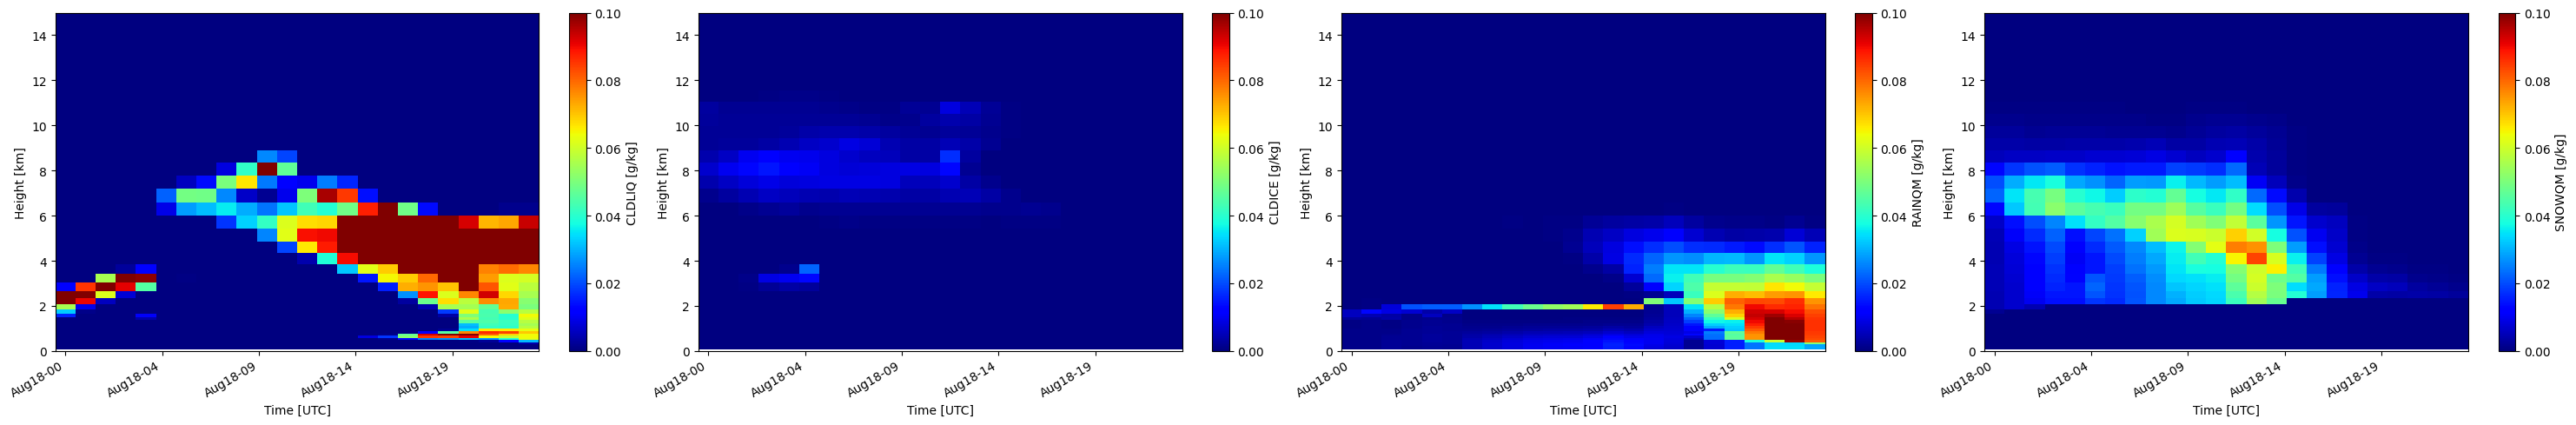

In [9]:



# Set input parameters.
cmap = 'jet'
field_to_plot = ["CLDLIQ","CLDICE","RAINQM","SNOWQM"]
vmin_max = [(0., 0.1),  (0., 0.1),(0., 0.1),(0., 0.1)]
log_plot = [False,  False,False,False]
is_radar_field = [False,  False,False,False]
#y_range = (200., 1e3)  # in hPa
y_range = (0,15)  # in m
subcol_ind = 0
NSA_coords = {"lat": 71.32, "lon": -156.61}

cbar_label = ['CLDLIQ [g/kg]','CLDICE [g/kg]','RAINQM [g/kg]','SNOWQM [g/kg]']

# jingjing modified    
#var_array = my_ds[variable].values.T *1000. # unit change to g /kg    
    

# Generate a SubcolumnDisplay object for coords closest to the NSA site
model_display2 = emc2.plotting.SubcolumnDisplay(my_e3sm, subplot_shape=(1,len(field_to_plot)), figsize=(15/2.*len(field_to_plot),5),
                                               lat_sel=NSA_coords["lat"],
                                               lon_sel=NSA_coords["lon"], tight_layout=True)


# Plot variables
for ii in range(len(field_to_plot)):
    
    emc2.statistics_LLNL.statistical_plots.plot_column_input_q_timeseries(model_display2,field_to_plot[ii], log_plot=log_plot[ii], y_range=y_range,
                                            subplot_index=(0, ii),  cmap=cmap, title='',
                                            vmin=vmin_max[ii][0], vmax=vmin_max[ii][1],cbar_label=cbar_label[ii],pressure_coords=False)

    
model_display2.fig.savefig(f'./{output_folder_name}/{case}/Input_Mixing_Ratios_km.png', dpi=150)


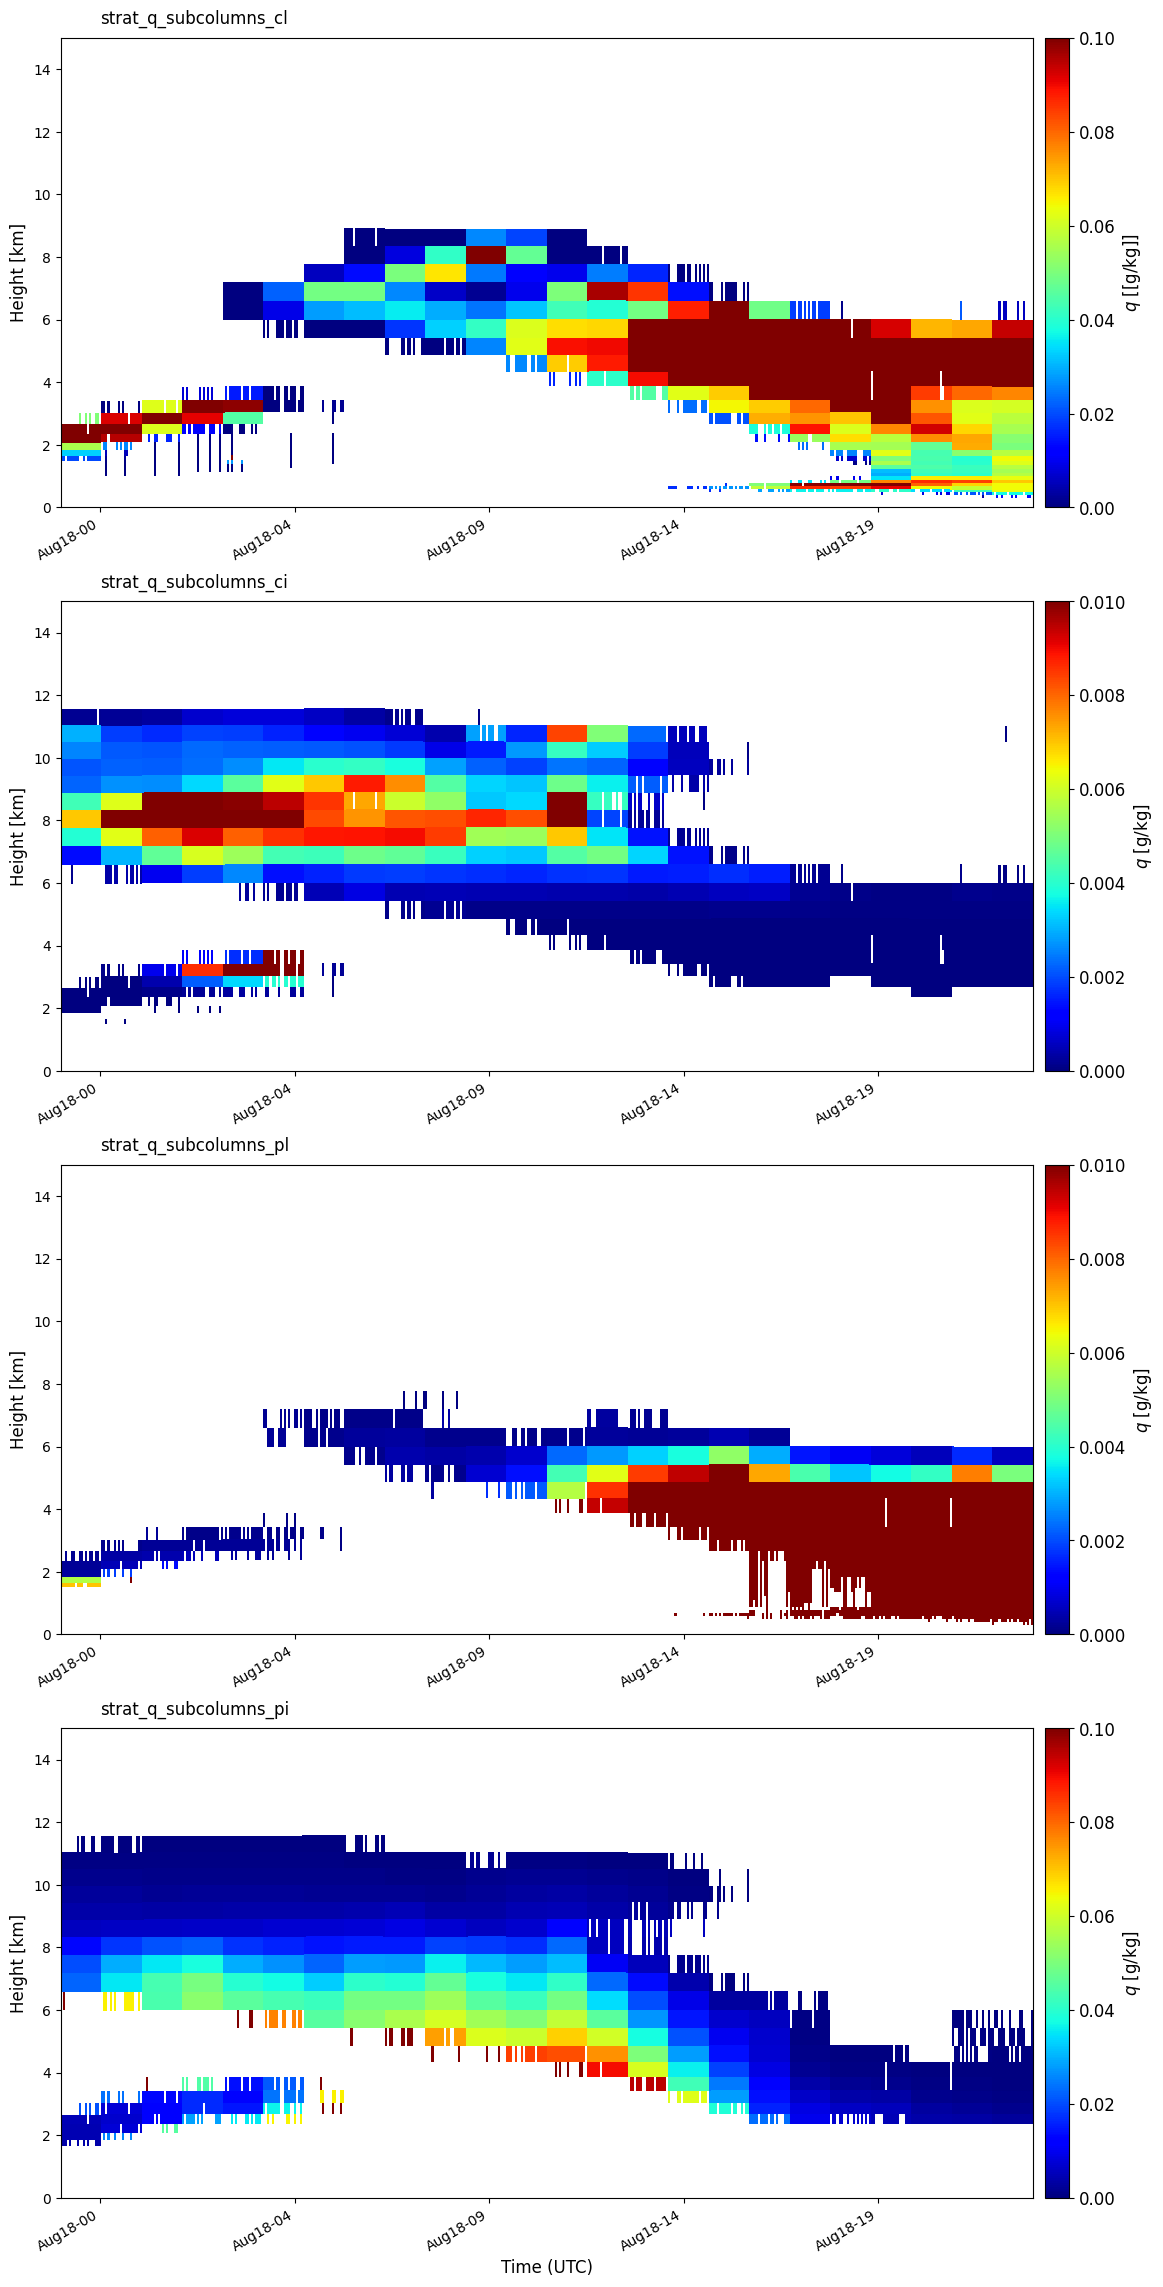

In [10]:
# subcolumn cl, ci, ql, qi
emc2.statistics_LLNL.statistical_plots.plot_every_subcolumn_timeseries_mixingratio(my_e3sm,col_index,'save',f'./{output_folder_name}/{case}','radar_radiation_addpl')



#  Prepare important radar and lidar signals used for stats


In [11]:


atb_total_4D,atb_mol_4D,z_full_km_3D,z_half_km_3D,Ze_att_total_4D=\
emc2.statistics_LLNL.statistical_aggregation.get_radar_lidar_signals(my_e3sm)


# Calculate lidar scatter ratio (SR)

In [12]:
# prepare height for vertical regridding in statistical aggregation

subcolum_num=len(my_e3sm.ds.subcolumn)
time_num=len(my_e3sm.ds.time)
col_num=len(my_e3sm.ds.ncol)
lev_num=len(my_e3sm.ds.lev)
    
Ncolumns=subcolum_num # subcolumn
Npoints=time_num # (time and col)
Nlevels=lev_num

Nglevels= 40
zstep = 0.480
levStat_km=np.arange(Nglevels)*zstep+zstep/2.
newgrid_bot=(levStat_km)-0.24
newgrid_top=(levStat_km)+0.24
newgrid_mid=(newgrid_bot+newgrid_top)/2.


In [13]:
SR_4D=emc2.statistics_LLNL.statistical_aggregation.calculate_SR(atb_total_4D,atb_mol_4D,subcolum_num,time_num,lev_num,z_full_km_3D,z_half_km_3D,\
                 Ncolumns,Npoints,Nlevels,Nglevels,col_num,newgrid_bot,newgrid_top)


# Plot time series of SR


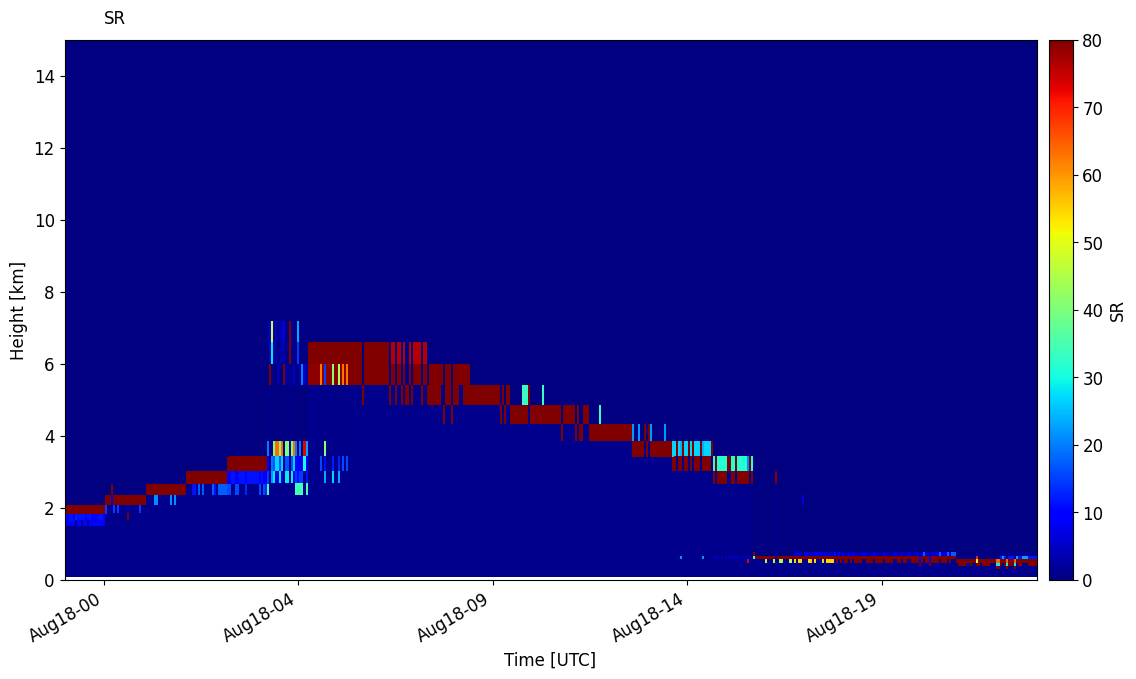

In [14]:

emc2.statistics_LLNL.statistical_plots.plot_every_subcolumn_timeseries_SR(my_e3sm,atb_total_4D,atb_mol_4D,col_index,'save',f'./{output_folder_name}/{case}/','addpl_rad')



# Plot CFAD

In [15]:
# this is the bins used in COSP

SR_EDGES=np.array([-1.,0.01,1.2,3.0,5.0,7.0,10.0,15.0,20.0,25.0,30.0,40.0,50.0, 60.0,80.0,999.])
SR_BINS_GR_ground=np.array([-4.950e-01 , 6.050e-01 , 2.100e+00,  4.000e+00,  6.000e+00 , 8.500e+00,1.250e+01 , 1.750e+01,  2.250e+01 , 2.750e+01 , 3.500e+01,  4.500e+01,\
  5.500e+01 , 7.000e+01, 5.395e+02])




In [16]:
cfadSR_cal_alltime=emc2.statistics_LLNL.statistical_aggregation.get_cfad_SR(SR_EDGES,newgrid_mid,Npoints,Ncolumns,SR_4D,col_index)
print(cfadSR_cal_alltime.shape)


cfadSR_cal_alltime_col=np.empty( (  Nglevels , len(SR_BINS_GR_ground), len(my_e3sm.ds.ncol.values) )  )

for i in my_e3sm.ds.ncol.values:
    cfadSR_cal_alltime_col[:,:,i]=emc2.statistics_LLNL.statistical_aggregation.get_cfad_SR(SR_EDGES,newgrid_mid,Npoints,Ncolumns,SR_4D,i)

cfadSR_cal_alltime=np.nanmean(cfadSR_cal_alltime_col,axis=2)    





(40, 15)


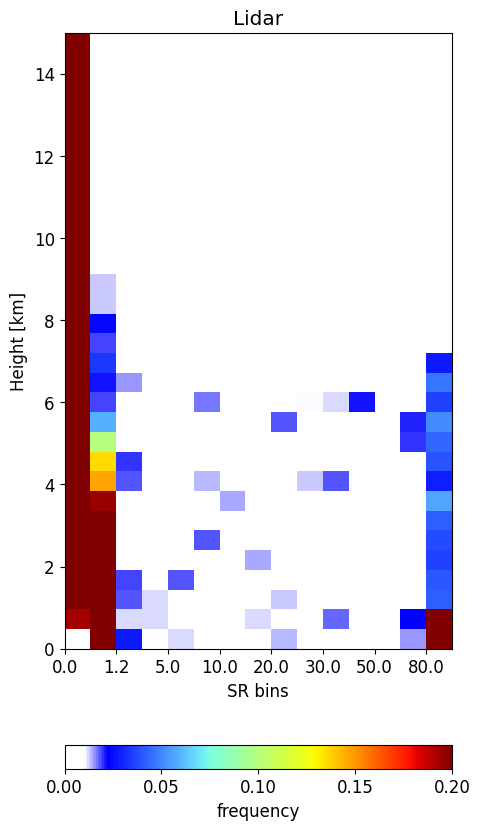

In [17]:

emc2.statistics_LLNL.statistical_plots.plot_lidar_SR_CFAD(SR_EDGES,newgrid_mid,cfadSR_cal_alltime,'save',f'./{output_folder_name}/{case}/','addpl_rad')


# Plot Simulated Signals

cropping lat dim (lat requested = 71.32)


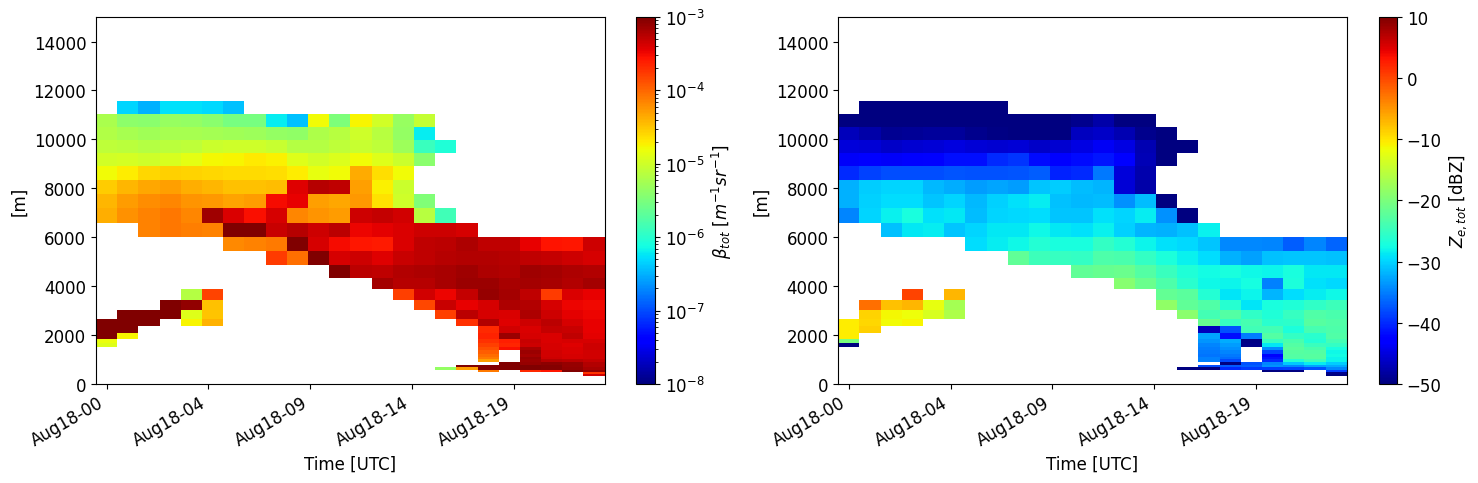

In [18]:

cmap = 'jet'
field_to_plot = ["sub_col_beta_p_tot","sub_col_Ze_att_tot"]
vmin_max = [(1e-8,1e-3),  (-50., 10.)]
log_plot = [True,  False]
is_radar_field = [False,  True]
#y_range = (200., 1e3)  # in hPa
y_range = (0,15000)  # in m
subcol_ind = 0
NSA_coords = {"lat": 71.32, "lon": -156.61}

# Generate a SubcolumnDisplay object for coords closest to the NSA site
model_display = emc2.plotting.SubcolumnDisplay(my_e3sm, subplot_shape=(1, len(field_to_plot)), figsize=(15,5),
                                               lat_sel=NSA_coords["lat"],
                                               lon_sel=NSA_coords["lon"], tight_layout=True)


# Plot variables
for ii in range(len(field_to_plot)):
    model_display.plot_subcolumn_timeseries(field_to_plot[ii], subcol_ind, log_plot=log_plot[ii], y_range=y_range,
                                            subplot_index=(0, ii),  cmap=cmap, title='',
                                            vmin=vmin_max[ii][0], vmax=vmin_max[ii][1],pressure_coords=False)

    
model_display.fig.savefig(f'./{output_folder_name}/{case}/Simulated_Lidar_Radar_Signal.png', dpi=50)




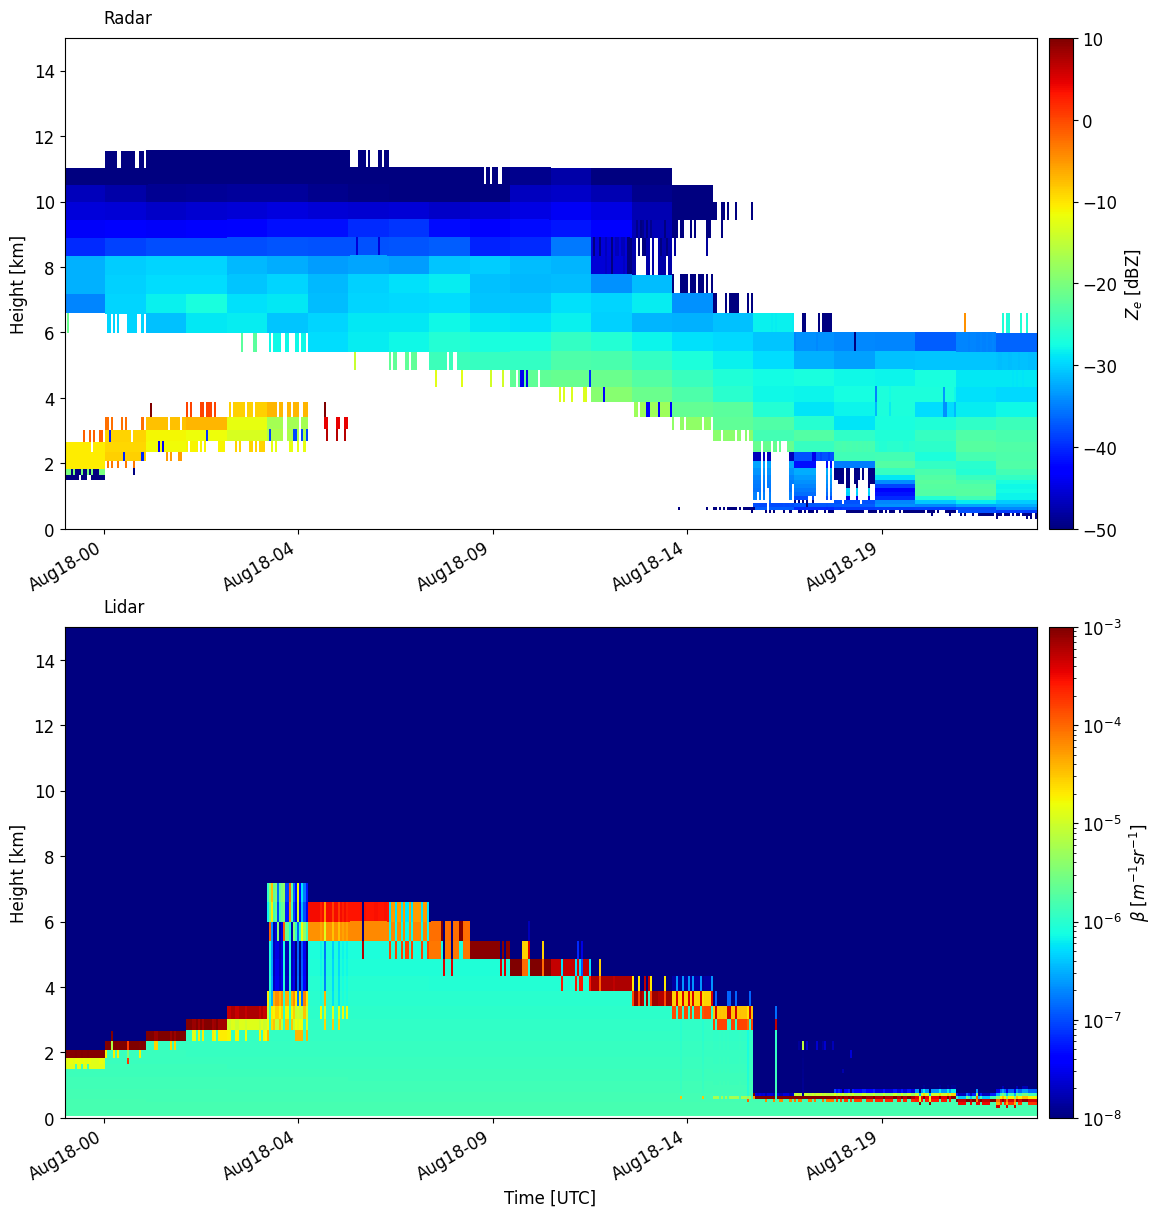

In [19]:
emc2.statistics_LLNL.statistical_plots.plot_every_subcolumn_timeseries_radarlidarsignal(my_e3sm,col_index,'save',f'./{output_folder_name}/{case}/','addpl_radiation')



# Calculate Cloud Fraction

In [20]:
CF_3D=emc2.statistics_LLNL.statistical_aggregation.calculate_lidar_CF(SR_4D,time_num,Nglevels,col_num)


cropping lat dim (lat requested = 71.32)


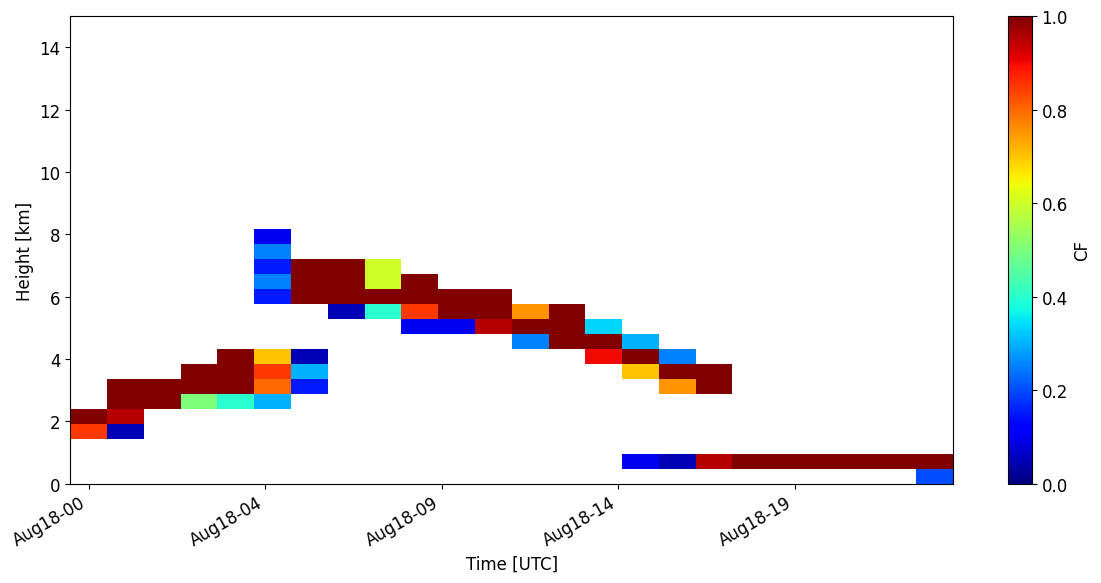

In [21]:

# Set input parameters.
cmap = 'jet'
field_to_plot = ["CF"]
vmin_max = [ (0., 1.)]
log_plot = [ False]
is_radar_field = [ False]
y_range = (0., 15)  # in km
subcol_ind = 0
NSA_coords = {"lat": 71.32, "lon": -156.61}

cbar_label = ['CF']


model_display3 = emc2.plotting.SubcolumnDisplay(my_e3sm, figsize=(24*0.5, 6), 
                                               lat_sel=NSA_coords["lat"],
                                               lon_sel=NSA_coords["lon"], tight_layout=True)  #figsize=(15/2.*len(field_to_plot),5),



for ii in range(len(field_to_plot)):
    emc2.statistics_LLNL.statistical_plots.plot_regridded_CF_timeseries(model_display3,CF_3D, newgrid_mid,col_index, y_range=y_range,
                                             cmap=cmap, title='',
                                            vmin=vmin_max[ii][0], vmax=vmin_max[ii][1],cbar_label=cbar_label[ii])

     
model_display3.fig.savefig(f'./{output_folder_name}/{case}/CF_column2_km_addpl_radiation.png', dpi=150)
  

## Resources and References

- [The EMC² manuscript (Silber et al. GMD, 2022)](https://doi.org/10.5194/gmd-15-901-2022)
- [EMC² documentation](https://columncolab.github.io/EMC2/)
- [EMC² source code](https://github.com/columncolab/EMC2)